- https://machinelearningmastery.com/xgboost-python-mini-course/

In [2]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
dataset = loadtxt('pima-indians-diabetes.data', delimiter=',')

In [4]:
X = dataset[:, 0:8]
Y = dataset[:, 8]

In [5]:
seed = 7
test_size = 0.33

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=test_size,
                                                    random_state=seed)

In [8]:
model = XGBClassifier()

In [9]:
model

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [10]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [13]:
y_pred = model.predict(X_test)

/Users/koichiro.mori/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [20]:
predictions = [round(value) for value in y_pred]

In [21]:
accuracy = accuracy_score(y_test, predictions)

In [22]:
print('Accuracy: %.2f%%' % (accuracy * 100.0))

Accuracy: 77.95%


## Monitor Performance

In [23]:
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric='error', eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.259843
[1]	validation_0-error:0.26378
[2]	validation_0-error:0.26378
[3]	validation_0-error:0.255906
[4]	validation_0-error:0.255906
[5]	validation_0-error:0.26378
[6]	validation_0-error:0.23622
[7]	validation_0-error:0.255906
[8]	validation_0-error:0.248031
[9]	validation_0-error:0.248031
[10]	validation_0-error:0.248031
[11]	validation_0-error:0.232283
[12]	validation_0-error:0.228346
[13]	validation_0-error:0.228346
[14]	validation_0-error:0.228346
[15]	validation_0-error:0.228346
[16]	validation_0-error:0.228346
[17]	validation_0-error:0.228346
[18]	validation_0-error:0.224409
[19]	validation_0-error:0.232283
[20]	validation_0-error:0.232283
[21]	validation_0-error:0.23622
[22]	validation_0-error:0.23622
[23]	validation_0-error:0.232283
[24]	validation_0-error:0.228346
[25]	validation_0-error:0.228346
[26]	validation_0-error:0.224409
[27]	validation_0-error:0.224409
[28]	validation_0-error:0.228346
[29]	validation_0-error:0.232283
[30]	validation_0-error:0.

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [27]:
# early stopping
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load data
dataset = loadtxt('pima-indians-diabetes.data', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [28]:
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10,
          eval_metric='logloss', eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.660186
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.634854
[2]	validation_0-logloss:0.612239
[3]	validation_0-logloss:0.593118
[4]	validation_0-logloss:0.578303
[5]	validation_0-logloss:0.564942
[6]	validation_0-logloss:0.555113
[7]	validation_0-logloss:0.54499
[8]	validation_0-logloss:0.539151
[9]	validation_0-logloss:0.531819
[10]	validation_0-logloss:0.526065
[11]	validation_0-logloss:0.51977
[12]	validation_0-logloss:0.514979
[13]	validation_0-logloss:0.50927
[14]	validation_0-logloss:0.506086
[15]	validation_0-logloss:0.503565
[16]	validation_0-logloss:0.503591
[17]	validation_0-logloss:0.500805
[18]	validation_0-logloss:0.497605
[19]	validation_0-logloss:0.495328
[20]	validation_0-logloss:0.494777
[21]	validation_0-logloss:0.494274
[22]	validation_0-logloss:0.493333
[23]	validation_0-logloss:0.492211
[24]	validation_0-logloss:0.491936
[25]	validation_0-logloss:0.490578
[26]	validation_0-logloss:0.490895


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [30]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

Accuracy: 78.35%


/Users/koichiro.mori/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [31]:
model.feature_importances_

array([0.05090909, 0.22909091, 0.06909091, 0.07636364, 0.04727273,
       0.17818181, 0.12      , 0.22909091], dtype=float32)

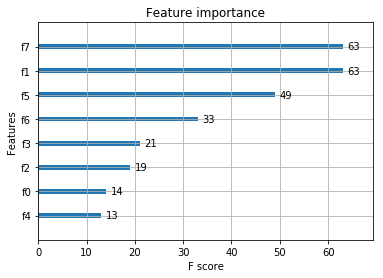

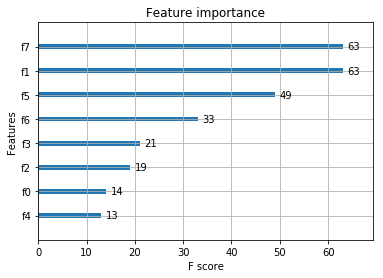

In [34]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
plot_importance(model)
plt.show()

## GridSearchCV

In [38]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [39]:
dataset = loadtxt('pima-indians-diabetes.data', delimiter=',')
X = dataset[:, 0:8]
Y = dataset[:, 8]

In [78]:
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
max_depth = [2, 3, 4, 5, 6, 7, 8]
param_grid = dict(learning_rate=learning_rate, max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

In [79]:
grid_search = GridSearchCV(model, param_grid, scoring='neg_log_loss', cv=kfold, verbose=1)
grid_result = grid_search.fit(X, Y)

Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.3min finished


In [80]:
print(grid_result)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=7, shuffle=True),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3], 'max_depth': [2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=1)


In [81]:
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

Best: -0.474370 using {'learning_rate': 0.1, 'max_depth': 2}


In [82]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

In [83]:
means.shape

(42,)

In [84]:
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

-0.690191 (0.000436) with: {'learning_rate': 0.0001, 'max_depth': 2}
-0.689811 (0.000475) with: {'learning_rate': 0.0001, 'max_depth': 3}
-0.689693 (0.000522) with: {'learning_rate': 0.0001, 'max_depth': 4}
-0.689601 (0.000576) with: {'learning_rate': 0.0001, 'max_depth': 5}
-0.689658 (0.000647) with: {'learning_rate': 0.0001, 'max_depth': 6}
-0.689721 (0.000695) with: {'learning_rate': 0.0001, 'max_depth': 7}
-0.689650 (0.000692) with: {'learning_rate': 0.0001, 'max_depth': 8}
-0.665218 (0.003422) with: {'learning_rate': 0.001, 'max_depth': 2}
-0.661827 (0.004625) with: {'learning_rate': 0.001, 'max_depth': 3}
-0.661373 (0.005126) with: {'learning_rate': 0.001, 'max_depth': 4}
-0.660677 (0.005290) with: {'learning_rate': 0.001, 'max_depth': 5}
-0.661091 (0.006120) with: {'learning_rate': 0.001, 'max_depth': 6}
-0.661779 (0.006098) with: {'learning_rate': 0.001, 'max_depth': 7}
-0.660922 (0.006108) with: {'learning_rate': 0.001, 'max_depth': 8}
-0.544308 (0.024432) with: {'learning_rat